In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with EDLAE model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.edlae import EDLAE

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = EDLAE

# L2 = [10 ** p for p in range(2, 6)]
L2 = [50, 100, 200, 500]
RHO = [50, 100, 200]
MAX_ITER = 10
HYPERPARAMS = {'l2': L2, 'rho': RHO, 'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2': [50, 100, 200, 500], 'rho': [50, 100, 200], 'max_iterations': 10}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
HYPERPARAMS['t'] = t
del S

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

## Perform gridsearch on validation set

In [7]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model EDLAE with hyperparameters {'l2': 50, 'rho': 50, 'max_iterations': 10, 't': 2158}


norm E 1.2823151258496095
norm D 747.9478629650524
diag norm: 13.52026190838907
diag_diff: 11.765945982104823

norm E 1.1155067686079037
norm D 778.1617233536114
diag norm: 13.11212474676408
diag_diff: 9.1408259619145
rho * change E: 23.629815713283328

norm E 1.0795785234114315
norm D 787.3607369673051
diag norm: 12.816700639831147
diag_diff: 7.1128846288852765
rho * change E: 7.486968497892203

norm E 1.0654071413691244
norm D 791.764484700184
diag norm: 12.658591681574757
diag_diff: 5.617634941860562
rho * change E: 4.070592674476588

norm E 1.0618292333912052
norm D 794.2672063390078
diag norm: 12.573031408753339
diag_diff: 4.499296382610562
rho * change E: 2.593436144979341

norm E 1.063020177973908
norm D 795.8444759352524
diag norm: 12.525300670582496
diag_diff: 3.6513763472687253
rho * change E: 1.8632961206046121

norm E 1.0659137399088379
norm D 796.89159836992
diag norm: 12.498114809496661
diag_diff: 2.998707341098243
rho * change E: 1.4512052569532727

norm E 1.069217774314

norm E 0.854967452355776
norm D 768.6406148103742
diag norm: 9.832094759563688
diag_diff: 8.850198285249819

norm E 0.7926277475556954
norm D 793.3996672573323
diag norm: 9.756895530686503
diag_diff: 7.479096241453492
rho * change E: 12.441433896623627

norm E 0.7725609071343723
norm D 800.4723540009572
diag norm: 9.577628962859151
diag_diff: 6.204404075778701
rho * change E: 4.226747215761362

norm E 0.760522888832833
norm D 804.351255957101
diag norm: 9.454632814982494
diag_diff: 5.174826139592843
rho * change E: 2.586586204284098

norm E 0.7535165665683137
norm D 806.8956033283796
diag norm: 9.373569067553209
diag_diff: 4.342946567410794
rho * change E: 1.7973710751963334

norm E 0.7498321016478496
norm D 808.6808822881401
diag norm: 9.31974540792522
diag_diff: 3.6658748856475545
rho * change E: 1.3162087545917898

norm E 0.7482360148219042
norm D 809.9540172330651
diag norm: 9.283335460717847
diag_diff: 3.1111563990905697
rho * change E: 1.0069896816749349

norm E 0.747866140897963

norm E 0.5485013687632873
norm D 780.4930904971742
diag norm: 6.659833812828402
diag_diff: 6.187686495081779

norm E 0.5292170886596952
norm D 803.1639985275497
diag norm: 6.712711343658646
diag_diff: 5.595248567479749
rho * change E: 6.446863197050743

norm E 0.5209347067209272
norm D 808.4981601738366
diag norm: 6.6341077039765315
diag_diff: 4.931066973909241
rho * change E: 2.154116219106306

norm E 0.5147819325417661
norm D 811.2997377576133
diag norm: 6.5663184188779935
diag_diff: 4.346602753510179
rho * change E: 1.3592612405888604

norm E 0.5101520511512668
norm D 813.3168766588957
diag norm: 6.513319648414525
diag_diff: 3.838564368374241
rho * change E: 1.034929468382103

norm E 0.5067489184142422
norm D 814.945627954113
diag norm: 6.472812717274558
diag_diff: 3.3970828805463964
rho * change E: 0.8317430528199382

norm E 0.5043104264466659
norm D 816.325687430996
diag norm: 6.441939704611518
diag_diff: 3.012238315909218
rho * change E: 0.6843257949575349

norm E 0.5026269386888

norm E 0.28476715160962246
norm D 788.8962365956208
diag norm: 3.5774438627130656
diag_diff: 3.437041430261486

norm E 0.28194162846364795
norm D 810.9349161814202
diag norm: 3.6430004122315873
diag_diff: 3.3018913776680354
rho * change E: 2.6806018069523647

norm E 0.28003282327042733
norm D 815.2651105167355
diag norm: 3.62562550101986
diag_diff: 3.0903854594984193
rho * change E: 0.8559021690555625

norm E 0.2783070206178908
norm D 817.0671800309235
diag norm: 3.60524881188217
diag_diff: 2.8876199858856886
rho * change E: 0.5016555091675723

norm E 0.2767627909866477
norm D 818.1948753091667
diag norm: 3.586110148002431
diag_diff: 2.6976587621991643
rho * change E: 0.37840181094226905

norm E 0.27540267590302064
norm D 819.0672643710199
diag norm: 3.5690183618087103
diag_diff: 2.5207255622727813
rho * change E: 0.3193340259261049

norm E 0.27421333398838643
norm D 819.8152729763515
diag norm: 3.5540219062402385
diag_diff: 2.3561835355000125
rho * change E: 0.28214602565987845

norm 

norm E 1.281633912482363
norm D 748.2406332562382
diag norm: 13.518430476001052
diag_diff: 10.36129669985494

norm E 1.086803444897747
norm D 787.2214326036773
diag norm: 12.997311715041487
diag_diff: 7.049883213346109
rho * change E: 50.298693488499886

norm E 1.0678640231656702
norm D 796.5302789428126
diag norm: 12.786629803182409
diag_diff: 4.93785216318242
rho * change E: 12.779858287273603

norm E 1.0675665407234955
norm D 800.3088939891353
diag norm: 12.682410175955745
diag_diff: 3.5341052353377864
rho * change E: 6.44479672199344

norm E 1.0715607723827925
norm D 802.3222295734981
diag norm: 12.625851538634638
diag_diff: 2.5777899775009594
rho * change E: 4.263268850512301

norm E 1.076022285661919
norm D 803.5685551350394
diag norm: 12.593652370258845
diag_diff: 1.9132744220188687
rho * change E: 3.134847983247642

norm E 1.0799362542162276
norm D 804.3809676836939
diag norm: 12.575380865642195
diag_diff: 1.4432149039078432
rho * change E: 2.425857281425031

norm E 1.083144404

norm E 0.8548300541956352
norm D 768.1572731493953
diag norm: 9.831543362431722
diag_diff: 7.967179624106339

norm E 0.7724066524344697
norm D 798.9844493649114
diag norm: 9.613619492831104
diag_diff: 5.948328988959072
rho * change E: 26.169280416103163

norm E 0.7576449729466933
norm D 807.9798843569577
diag norm: 9.473068712893385
diag_diff: 4.462604043067302
rho * change E: 7.925068140671882

norm E 0.7525076951050734
norm D 812.1092226665551
diag norm: 9.394473754438053
diag_diff: 3.3843549963739674
rho * change E: 4.27477412289992

norm E 0.7516353849868291
norm D 814.4017039067191
diag norm: 9.348008600536165
diag_diff: 2.5936853075318544
rho * change E: 2.716498769281944

norm E 0.752394297874322
norm D 815.8320095586331
diag norm: 9.31873634500775
diag_diff: 2.007625859511063
rho * change E: 1.9547307260311755

norm E 0.7536212956885829
norm D 816.7751399828043
diag norm: 9.299454250056503
diag_diff: 1.5683913306160933
rho * change E: 1.5074000691063842

norm E 0.75489156903253

norm E 0.5490344323980699
norm D 780.42360392833
diag norm: 6.659873867146197
diag_diff: 5.714202094823844

norm E 0.5192144655111164
norm D 805.307287782579
diag norm: 6.607540279387849
diag_diff: 4.669870659159156
rho * change E: 13.177381633061762

norm E 0.5108651294384311
norm D 812.4703694276566
diag norm: 6.526540211480329
diag_diff: 3.776487551392271
rho * change E: 4.417161383214995

norm E 0.5060912265146968
norm D 816.3649069042882
diag norm: 6.471750485000736
diag_diff: 3.0653028151423727
rho * change E: 2.7010790242266407

norm E 0.5035024795306744
norm D 818.8533595946456
diag norm: 6.435641513841037
diag_diff: 2.4986691697919463
rho * change E: 1.8568060986275026

norm E 0.5022771246623723
norm D 820.5870530128044
diag norm: 6.411421282159632
diag_diff: 2.044883118300727
rho * change E: 1.3472143619122834

norm E 0.5018572027477964
norm D 821.8218937450947
diag norm: 6.394731445352318
diag_diff: 1.6799459973525614
rho * change E: 1.0258080046233895

norm E 0.501869460919

norm E 0.2840177763855268
norm D 789.2700140075913
diag norm: 3.5773706839974544
diag_diff: 3.27789176833682

norm E 0.27790142527682155
norm D 811.5053497586057
diag norm: 3.6013954566057644
diag_diff: 2.95366108311704
rho * change E: 5.3290846467502675

norm E 0.27534813656008594
norm D 816.4844614078019
diag norm: 3.576041763542315
diag_diff: 2.6127954348459843
rho * change E: 1.7524599658732536

norm E 0.27338023078902857
norm D 818.9858472023412
diag norm: 3.5531174985690117
diag_diff: 2.3098748566214025
rho * change E: 1.1005563140379826

norm E 0.2718485191930594
norm D 820.7805359992124
diag norm: 3.5345510138762926
diag_diff: 2.0433406999914596
rho * change E: 0.8478525353588271

norm E 0.27067889399799505
norm D 822.2570800219048
diag norm: 3.5199339131465233
diag_diff: 1.809197498989169
rho * change E: 0.6955668228456752

norm E 0.26980207332549133
norm D 823.5284172499142
diag norm: 3.508527569589525
diag_diff: 1.603335212931946
rho * change E: 0.5827493503263282

norm E 0.

norm E 1.2818337219643559
norm D 747.8372601409874
diag norm: 13.518820369639455
diag_diff: 9.057552178373438

norm E 1.079907659708548
norm D 792.3695874550419
diag norm: 12.967988461093901
diag_diff: 5.4480661995339466
rho * change E: 104.09089058060854

norm E 1.0710577047776098
norm D 801.3541729877649
diag norm: 12.773608250792746
diag_diff: 3.4002122577750256
rho * change E: 23.553474099955945

norm E 1.0752743382620877
norm D 804.7217356571699
diag norm: 12.679188012043141
diag_diff: 2.166833222392781
rho * change E: 11.888903971775274

norm E 1.080377324487732
norm D 806.454298613789
diag norm: 12.629800981420024
diag_diff: 1.4077895262633233
rho * change E: 7.689847349132834

norm E 1.084518454864487
norm D 807.4977249795849
diag norm: 12.604051917398378
diag_diff: 0.9331985570082985
rho * change E: 5.471070712765787

norm E 1.0876263524517376
norm D 808.1605350552206
diag norm: 12.591714397811982
diag_diff: 0.6321373594922656
rho * change E: 4.1181793560947675

norm E 1.08994

norm E 0.8547469381785604
norm D 768.2745830656811
diag norm: 9.832908296378593
diag_diff: 7.002665658274187

norm E 0.762947366785186
norm D 806.457844693479
diag norm: 9.578455615744781
diag_diff: 4.597187474092924
rho * change E: 55.1443724452542

norm E 0.7554691181510479
norm D 815.1766555881015
diag norm: 9.465160492712615
diag_diff: 3.0716694013140957
rho * change E: 13.750789671693902

norm E 0.7556438325717776
norm D 818.6500659920775
diag norm: 9.403841602517815
diag_diff: 2.0795364033709207
rho * change E: 6.992351577622946

norm E 0.7573005144796334
norm D 820.4832215421743
diag norm: 9.367334156170815
diag_diff: 1.4245110308974367
rho * change E: 4.560380232762168

norm E 0.7589721389126481
norm D 821.5774785591525
diag norm: 9.344501440329914
diag_diff: 0.9870298245660478
rho * change E: 3.277402643631494

norm E 0.7603355065262033
norm D 822.3013174698499
diag norm: 9.329884195453293
diag_diff: 0.691876112036777
rho * change E: 2.4802798844239997

norm E 0.76137947299563

norm E 0.5483192801004249
norm D 780.475862834069
diag norm: 6.6592848907325335
diag_diff: 5.100556047754349

norm E 0.5107630409541329
norm D 811.4043690553918
diag norm: 6.5553082508562905
diag_diff: 3.6829753283260604
rho * change E: 27.713280864415587

norm E 0.5051284505184751
norm D 820.1129919084447
diag norm: 6.491429925747335
diag_diff: 2.668067927772642
rho * change E: 8.198333494174328

norm E 0.5034809100692068
norm D 824.0280542725568
diag norm: 6.454815684233415
diag_diff: 1.9453190058135283
rho * change E: 4.397724562982584

norm E 0.5034257351196938
norm D 826.1523389838612
diag norm: 6.432438379723285
diag_diff: 1.4274023684428634
rho * change E: 2.780481185659646

norm E 0.5038915022887659
norm D 827.501622982949
diag norm: 6.417870892588902
diag_diff: 1.0538057156474998
rho * change E: 1.985170786861024

norm E 0.5044566562898685
norm D 828.4205401450807
diag norm: 6.408006002839216
diag_diff: 0.7825866087953707
rho * change E: 1.5237708474831506

norm E 0.5049830279

norm E 0.284207737836086
norm D 788.609782732195
diag norm: 3.5777465014510086
diag_diff: 3.023880416884843

norm E 0.274715313963253
norm D 812.4134863438331
diag norm: 3.566073749514092
diag_diff: 2.4783076793184304
rho * change E: 10.811865872316483

norm E 0.27205932290843693
norm D 818.950489027062
diag norm: 3.538853496499999
diag_diff: 2.0114186017295363
rho * change E: 3.6194097967051753

norm E 0.27045089497704583
norm D 822.5530693009111
diag norm: 3.519572175851894
diag_diff: 1.6343218197553362
rho * change E: 2.2603840559115147

norm E 0.2695070148291101
norm D 824.9816509464232
diag norm: 3.506490530256422
diag_diff: 1.330248539517922
rho * change E: 1.5997380205893448

norm E 0.2690026413939412
norm D 826.7472428344431
diag norm: 3.4975726262426536
diag_diff: 1.0845716048560623
rho * change E: 1.181598297754754

norm E 0.26877539285553464
norm D 828.0274688139326
diag norm: 3.4914002094734116
diag_diff: 0.8856264242996622
rho * change E: 0.9004922057271936

norm E 0.26871

In [8]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.32052145901943 achieved with {'l2': 100, 'rho': 50, 'max_iterations': 10, 't': 2158}."

## Evaluate model with optimal hyperparams on test set

In [9]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)

norm E 0.855202168501103
norm D 768.3410434131865
diag norm: 9.832134778586088
diag_diff: 8.849805458484065

norm E 0.7929502320696032
norm D 793.1108541901999
diag norm: 9.75745643686079
diag_diff: 7.47928959817519
rho * change E: 12.435422323880635

norm E 0.7729545993968232
norm D 800.2173654046751
diag norm: 9.57828935550758
diag_diff: 6.204621853249347
rho * change E: 4.2277454001893355

norm E 0.7609757106953062
norm D 804.1361466584732
diag norm: 9.455415436745021
diag_diff: 5.174995950227857
rho * change E: 2.5891051417778734

norm E 0.7540197689723358
norm D 806.6991339324052
diag norm: 9.374426009126193
diag_diff: 4.343076482621832
rho * change E: 1.797912708373605

norm E 0.7503721681029406
norm D 808.4881285858138
diag norm: 9.320638694110714
diag_diff: 3.6659680197032833
rho * change E: 1.3159867440155542

norm E 0.7488024394290526
norm D 809.7649539074665
diag norm: 9.284241987478607
diag_diff: 3.111208974515965
rho * change E: 1.0061096717556761

norm E 0.748453296042624

In [10]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 1500 users
Average Recall@20 0.488
Average Recall@100 0.657
Average nDCG@100 0.322


## Plot amount of items from long tail recommended

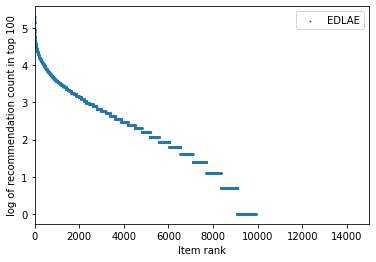

In [11]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["EDLAE"], k=100)